#### Import libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import time

/Users/parisaabbasi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Load and explore the shape file

In [2]:
gdf = gpd.read_file("./GA_initial.shp")

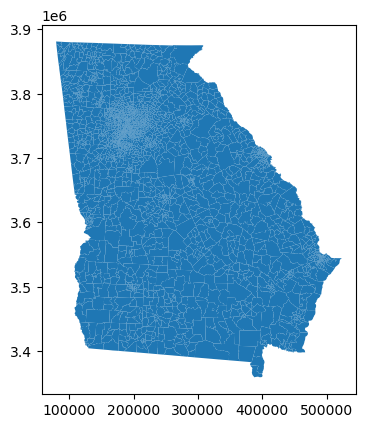

In [3]:
gdf.plot()
plt.show()

In [4]:
print(gdf.columns)

Index(['G18GOVRKEM', 'G18GOVDABR', 'G18ATGRCAR', 'G18ATGDBAI', 'G18AGRRBLA',
       'G18AGRDSWA', 'VAP', 'BVAP', 'geometry'],
      dtype='object')


In [5]:
gdf = gdf.dropna()
ga_json = gdf.to_json()
ga_graph = Graph.from_json(ga_json)

In [ ]:
VAP = sum([ga_graph.nodes()[v]['VAP'] for v in ga_graph.nodes()])
NUM_GA_DISTS = 14
IDEAL_VAP = VAP / NUM_GA_DISTS
TOLERANCE = 0.02

In [ ]:
#Determine number of democratic-won districts for a given partition
def dem_winning_dists(partition):

      num_wins = 0

      for p_dem in partition["PRES20"].percents("Democratic"):
            if p_dem > 0.5:
                  num_wins += 1

      return num_wins

In [ ]:
#Determine number of majority latino districts for a given partition
def get_num_maj_latino_dists(partition):
         
        num_dists = 0
    
        for dist in partition.parts:
                if partition["dist_pop"][dist] > 0 and partition["dist_latino_pop"][dist]/partition["dist_pop"][dist] > 0.5:
                    num_dists += 1
    
        return num_dists